In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

#import the relevant packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
print(tf.version)
print(tf.keras.__version__)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>
2.4.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'


/content/drive/My Drive/Colab Notebooks


# Loading and Exploring the Data

In [ ]:
# load numpy array from npy file
from numpy import load
# load array
data = load('fmnist_train.npy', allow_pickle=True).item()
testdata = load('fmnist_test.npy', allow_pickle=True).item()

In [ ]:
data['features'].shape

(60000, 28, 28)

In [ ]:
x_train1 = data['features'].reshape([60000, 28*28])
y_train1 = data['target'].astype(int) - 1

x_test1 = testdata['features'].reshape([10000, 28*28])

In [ ]:
y_train1


array([4, 1, 0, ..., 2, 0, 3])

In [ ]:
# split the training data into train and validate arrays (will be used later)
from sklearn.model_selection import train_test_split

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train1, y_train1, test_size=0.4, random_state=12345,
)

x_test, x_validate, y_test, y_validate = train_test_split(
    x_validate, y_validate, test_size=0.5, random_state=12345,
)

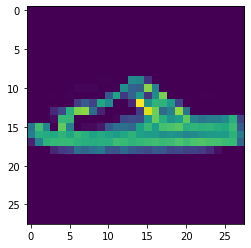

In [ ]:
# lets see what the images look like

image = x_train[500, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [ ]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))


x_train shape: (36000, 28, 28, 1)
x_test shape: (12000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


# Defining the model

First, we’ll design the NN architecture by deciding the number of layers and activation functions as discussed in CM4


In [ ]:
cnn_model_4 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(5, activation='softmax', name='Output')
])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout-1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
Dropout-2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
Dense (Dense)                (None, 64)               

This provides a table-format summary of the network architecture and parameters.

In [ ]:
print(cnn_model_4.summary())

# Compiling the model

In this step, we compile the model based on below settings,

**Loss function** — this calculates the difference between the expected target and output results. Cross-entropy is the default loss function to use for a multi-class classification problem. If target variables are integers (not one-hot coded) we used sparss. Therefore for this classification problem, we chose the sparse_categorical_crossentropy loss function. 

**Optimizer** — this will make the neural network update the parameters for our neural network during the training process is based on the data and the loss function. We use Adam as it is popular shown to be effective and efficient.

**Metrics** — this monitors the training and testing steps. We use accuracy because we would like to know the percentage images correctly classified

In [ ]:
cnn_model_4.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )


# Train the model

Next, we train the model by fitting it to the training data, so we give it the input (images) and expected output (labels). Here, an important step to minimize overfitting is validation. There are a few ways to validate, in this case, we provide our validation set to the function. We use 20% of the training data for validation and another 20% for evaluation and 60% for training.

We also need to define how many times the network will be trained, this is an epoch. It’s an arbitrary cutoff and here we choose 50 epochs.

In [ ]:
#%%timeit  
history4 = cnn_model_4.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=50, verbose=1,
    validation_data=(x_validate, y_validate)
)

Epoch 1/50
71/71 [==============================] - 2s 17ms/step - loss: 0.9945 - accuracy: 0.5801 - val_loss: 0.5984 - val_accuracy: 0.7588
Epoch 2/50
71/71 [==============================] - 1s 14ms/step - loss: 0.5774 - accuracy: 0.7676 - val_loss: 0.4802 - val_accuracy: 0.8131
Epoch 3/50
71/71 [==============================] - 1s 14ms/step - loss: 0.4838 - accuracy: 0.8051 - val_loss: 0.4425 - val_accuracy: 0.8200
Epoch 4/50
71/71 [==============================] - 1s 14ms/step - loss: 0.4248 - accuracy: 0.8308 - val_loss: 0.3787 - val_accuracy: 0.8519
Epoch 5/50
71/71 [==============================] - 1s 14ms/step - loss: 0.3856 - accuracy: 0.8475 - val_loss: 0.3489 - val_accuracy: 0.8689
Epoch 6/50
71/71 [==============================] - 1s 14ms/step - loss: 0.3473 - accuracy: 0.8625 - val_loss: 0.3650 - val_accuracy: 0.8520
Epoch 7/50
71/71 [==============================] - 1s 14ms/step - loss: 0.3357 - accuracy: 0.8673 - val_loss: 0.3218 - val_accuracy: 0.8723
Epoch 8/50
71

# Evaluate the model

Here we evaluate the model which we just trained.

We do this on a test dataset not seen by the model yet. This is the reason we split our train, test and validate sets previously.

In [ ]:
score = cnn_model_4.evaluate(x_test, y_test, verbose=0)

test loss: 0.2817
 test acc: 0.9029


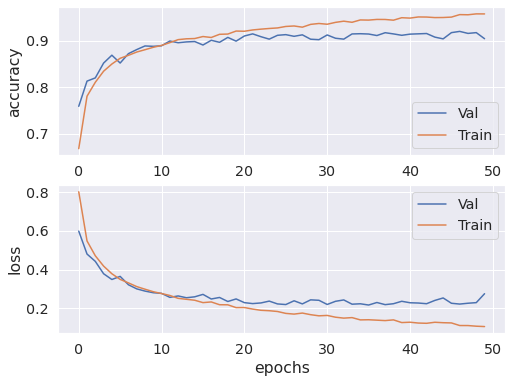

In [ ]:
print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = history4.history['accuracy']
loss = history4.history['loss']
val_acc = history4.history['val_accuracy']
val_loss = history4.history['val_loss']
ax1.plot(val_acc, label='Val')
ax1.plot(acc, label='Train')
ax2.plot(val_loss, label='Val')
ax2.plot(loss, label='Train')
    
ax1.set_ylabel('accuracy')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
y_pred = cnn_model_4.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


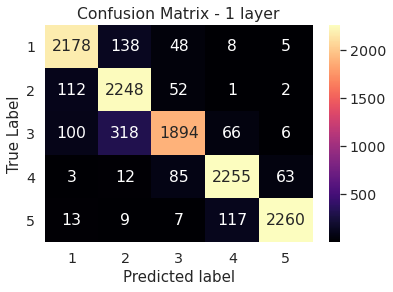

<Figure size 720x504 with 0 Axes>

              precision    recall  f1-score   support

           1       0.91      0.92      0.91      2377
           2       0.82      0.93      0.87      2415
           3       0.91      0.79      0.85      2384
           4       0.92      0.93      0.93      2418
           5       0.97      0.94      0.95      2406

    accuracy                           0.90     12000
   macro avg       0.91      0.90      0.90     12000
weighted avg       0.91      0.90      0.90     12000



In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred) 

labels = ['1', '2', '3', '4', '5'] #Check thiss

#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_mtx)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - 1 layer')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

print(metrics.classification_report((y_test+1),(y_pred+1)))